# 1. Perkenalan

```
Nama    : Dini Anggriyani
Program ini dibuat untuk menganalisa penjualan perusahaan selama 1 minggu pertama di Bulan Juli 2024. Hasil visualisasi dari analisa data ini akan dituangkan dalam Tableau pada link berikut: [Tableau]() 

## Business Understanding

SWOT FrameWork
* Strength => Layanan PTD memiliki keuntungan yang besar, maskapai yang memiliki Cost Ratio yang rendah seperti Pelita Air bisa menjadi keunggulan dalam bisnis bagi perusahaan
* Weakness => Layanan DTD cenderung memiliki pendapatan yang rendah meskipun biaya yang dikeluarkan perusahaan cukup tinggi
* Opportunities => Optimasi layanan PTD, perluas kerjasama dengan maskapai yang efisien, dan program retensi yang profitable bisa menjadi peluang bagi perusahaan untuk meningkatkan pendapatannya
* Threats => Fluktuasi biaya operasional yang tidak menentu



Dengan meningkatkan layanan PTD, meningkatkan keberlangganan dengan maskapai yang memiliki Cost Ratio rendah, evaluasi layanan DTD, peningkatan peluang bagi perusahaan untuk meningkatkan pendapatannya dapat dilakukan.

# 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Loading

In [3]:
df = pd.read_csv("dataset.csv")
df

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
0,01/Jul/2024,CITILINK,JAKARTA,MEDAN,QG-0916,5,"72,00",PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300
1,01/Jul/2024,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,"15,00",PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200
2,01/Jul/2024,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,"77,00",PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800
3,01/Jul/2024,CITILINK,JAKARTA,BATAM,QG-0968,6,"95,00",PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050
4,01/Jul/2024,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,"100,00",PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28658,07/Jul/2025,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,"10,00",PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870
28659,07/Jul/2024,FREIGHTER,JAKARTA,TARAKAN,ECA245,5,"51,00",PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200
28660,07/Jul/2024,FREIGHTER,JAKARTA,TARAKAN,ECA245,11,"123,00",PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200
28661,07/Jul/2024,FREIGHTER,JAKARTA,TARAKAN,ECA245,10,"127,00",PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200


Data terdisi dari 14 kolom dan 28.663 baris. Berikut ini penjelasan informasi dari setiap kolom:
* DATE          : Tanggal transaksi 
* AIRLINES      : Maskapai yang digunakan untuk pengiriman cargo 
* ORIGIN        : Kota asal pengiriman 
* DESTINATION   : Kota tujuan pengiriman
* FLIGHT_NUMB   : Kode penerbangan berdasarkan maskapai dan rute
* COLLY         : Jumlah karung pengiriman 
* WEIGHT        : Total berat pengiriman dari semua jumlah karungan 
* CUSTOMER      : Nama Customer 
* CUST_ID       : Kode unik Customer 
* SERVICE       : Jenis service pengiriman yang digunakan 
* COST_A        : Komponen cost 1 
* COST_B        : Komponen cost 2 
* COST_C        : Komponen cost 3 
* PRICE         : Harga jual per Kg 

Selanjutnya akan dilakukan pengecekan terhadap jenis data dari masing-masing kolom dan keberadaan missing value.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28663 entries, 0 to 28662
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         28663 non-null  object
 1   AIRLINES     28663 non-null  object
 2   ORIGIN       28663 non-null  object
 3   DESTINATION  28663 non-null  object
 4   FLIGHT_NUMB  28663 non-null  object
 5   COLLY        28663 non-null  int64 
 6    WEIGHT      28663 non-null  object
 7   CUSTOMER     28654 non-null  object
 8   CUST_ID      28663 non-null  object
 9   SERVICE      28663 non-null  object
 10  COST_A       28663 non-null  int64 
 11  COST_B       28663 non-null  int64 
 12  COST_C       28663 non-null  int64 
 13  PRICE        28663 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


Dapat dilihat bahwa data memiliki beberapa 9 missing value pada kolom CUSTOMER dan terdapat kolom DATE dan kolom WEIGHT yang memiliki jenis data yang tidak sesuai

In [5]:
df['CUSTOMER'].unique()

array(['PT DINDA SETIA KIRANA', 'PT FAJRI ABANGDA PRATAMA', nan,
       'PT ADANI SUBUR MAKMUR', 'PT BAYA SKENA MENYALA',
       'PT HABIB REZA ALKARIM', 'PT PRIMA CAHAYA MEGA'], dtype=object)

In [6]:
df['CUSTOMER'].mode()

0    PT PRIMA CAHAYA MEGA
Name: CUSTOMER, dtype: object

# 4. Data Cleaning

## Penghapusan White Space Pada Nama Kolom dan Value Kolom

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'COLLY',
       'WEIGHT', 'CUSTOMER', 'CUST_ID', 'SERVICE', 'COST_A', 'COST_B',
       'COST_C', 'PRICE'],
      dtype='object')

In [9]:
df['WEIGHT'].unique()

array(['  72,00 ', '  15,00 ', '  77,00 ', '  95,00 ', '  100,00 ',
       '  17,00 ', '  40,00 ', '  157,00 ', '  89,00 ', '  10,00 ',
       '  18,00 ', '  21,00 ', '  171,00 ', '  147,00 ', '  66,00 ',
       '  334,00 ', '  23,00 ', '  90,00 ', '  137,00 ', '  217,00 ',
       '  323,00 ', '  85,00 ', '  34,00 ', '  55,00 ', '  12,00 ',
       '  78,00 ', '  69,00 ', '  141,00 ', '  170,00 ', '  36,00 ',
       '  50,00 ', '  27,00 ', '  11,00 ', '  56,00 ', '  58,00 ',
       '  47,00 ', '  28,00 ', '  63,00 ', '  62,00 ', '  98,00 ',
       '  200,00 ', '  81,00 ', '  19,00 ', '  26,00 ', '  24,00 ',
       '  61,00 ', '  31,00 ', '  173,00 ', '  74,00 ', '  53,00 ',
       '  142,00 ', '  13,00 ', '  42,00 ', '  29,00 ', '  73,00 ',
       '  38,00 ', '  60,00 ', '  14,00 ', '  112,00 ', '  80,00 ',
       '  20,00 ', '  43,00 ', '  37,00 ', '  218,00 ', '  35,00 ',
       '  190,00 ', '  114,00 ', '  160,00 ', '  59,00 ', '  232,00 ',
       '  520,00 ', '  252,00 ', '  254,00 

In [10]:
df['WEIGHT'] = df['WEIGHT'].str.replace(" ", "").str.replace('.', '').str.replace(',', '.')
df['WEIGHT'].unique()

array(['72.00', '15.00', '77.00', '95.00', '100.00', '17.00', '40.00',
       '157.00', '89.00', '10.00', '18.00', '21.00', '171.00', '147.00',
       '66.00', '334.00', '23.00', '90.00', '137.00', '217.00', '323.00',
       '85.00', '34.00', '55.00', '12.00', '78.00', '69.00', '141.00',
       '170.00', '36.00', '50.00', '27.00', '11.00', '56.00', '58.00',
       '47.00', '28.00', '63.00', '62.00', '98.00', '200.00', '81.00',
       '19.00', '26.00', '24.00', '61.00', '31.00', '173.00', '74.00',
       '53.00', '142.00', '13.00', '42.00', '29.00', '73.00', '38.00',
       '60.00', '14.00', '112.00', '80.00', '20.00', '43.00', '37.00',
       '218.00', '35.00', '190.00', '114.00', '160.00', '59.00', '232.00',
       '520.00', '252.00', '254.00', '464.00', '120.00', '296.00',
       '71.00', '298.00', '82.00', '384.00', '93.00', '294.00', '345.00',
       '46.00', '135.00', '584.00', '119.00', '340.00', '196.00',
       '293.00', '462.00', '41.00', '359.00', '447.00', '152.00',
       '

In [11]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Kolom {col}: {unique_values}\n")

Kolom DATE: ['01/Jul/2024' '01/Jul/2025' '02/Jul/2024' '03/Jul/2024' '05/Jul/2024'
 '05/Jul/2025' '04/Jul/2024' '03/Jul/2025' '06/Jul/2024' '07/Jul/2024'
 '07/Jul/2025']

Kolom AIRLINES: ['CITILINK' 'GARUDA' 'LION AIR' 'SRIWIJAYA AIR' 'FREIGHTER' 'PELITA AIR']

Kolom ORIGIN: ['JAKARTA' 'DKI JAKARTA' 'DENPASAR' 'MEDAN' 'PONTIANAK' 'SOLO' 'MAKASSAR'
 'SURABAYA' 'SEMARANG' 'BALIKPAPAN' 'PEKANBARU' 'KENDARI' 'BANJARMASIN'
 'PADANG' 'BATAM' 'PALU' 'PALANGKARAYA' 'MANADO']

Kolom DESTINATION: ['MEDAN' 'BALIKPAPAN' 'MAKASSAR' 'BATAM' 'BANJARMASIN' 'BENGKULU'
 'PONTIANAK' 'PADANG' 'KENDARI' 'SURABAYA' 'DENPASAR' 'PEKANBARU'
 'SAMARINDA' 'PALANGKARAYA' 'PANGKAL PINANG' 'TANJUNG PINANG' 'PALEMBANG'
 'AMBON' 'BALIK PAPAN' 'JAYAPURA' 'TARAKAN' 'JAMBI' 'LOMBOK' 'TIMIKA'
 'ACEH' 'KUPANG' 'MANADO' 'PALU' 'TERNATE' 'TANJUNG PANDAN' 'SOLO'
 'SEMARANG' 'LAMPUNG' 'GORONTALO' 'SORONG' 'MANOKWARI' 'PANGKALANBUN'
 'LABUAN BAJO' 'BANYUWANGI' 'MALANG' 'BIAK' 'MERAUKE' 'JAKARTA'
 'BANDA ACEH']

Kolom FLIGHT_NU

Dari hasil analisa di atas, dapat dilihat bahwa kolom ORIGIN memiliki 2 value yang sebenarnya sama yaitu JAKARTA dan DKI JAKARTA. Oleh karena itu, kedua value tersebut akan disamakan untuk memudahkan identifikasi

In [12]:
df['ORIGIN'] = df['ORIGIN'].str.replace('DKI JAKARTA', 'JAKARTA')
df['ORIGIN'].unique()

array(['JAKARTA', 'DENPASAR', 'MEDAN', 'PONTIANAK', 'SOLO', 'MAKASSAR',
       'SURABAYA', 'SEMARANG', 'BALIKPAPAN', 'PEKANBARU', 'KENDARI',
       'BANJARMASIN', 'PADANG', 'BATAM', 'PALU', 'PALANGKARAYA', 'MANADO'],
      dtype=object)

In [13]:
df.columns

Index(['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'COLLY',
       'WEIGHT', 'CUSTOMER', 'CUST_ID', 'SERVICE', 'COST_A', 'COST_B',
       'COST_C', 'PRICE'],
      dtype='object')

Selain itu, kita juga dapat melihat kesalahan pada kolom DATE yaitu pada penulisan tahun. Data ini merupakan data penjualan perusahaan pada minggu pertama bulan Juli tahun 2024. Namun, ada kesalahan pada beberapa value yang tertulis tahun 2025. Oleh karena itu kita akan melakukan perbaikan sebagai berikut

In [14]:
df['DATE'] = df['DATE'].str.replace('2025', '2024')

print(f'Nilai unik kolom DATE: ', df['DATE'].unique())

Nilai unik kolom DATE:  ['01/Jul/2024' '02/Jul/2024' '03/Jul/2024' '05/Jul/2024' '04/Jul/2024'
 '06/Jul/2024' '07/Jul/2024']


## Ubah Tipe Data

In [15]:
df['WEIGHT'] = df['WEIGHT'].astype(float)
df['DATE'] = pd.to_datetime(df['DATE'])
df[['WEIGHT', 'DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28663 entries, 0 to 28662
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WEIGHT  28663 non-null  float64       
 1   DATE    28663 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 448.0 KB


In [16]:
df['DATE'] = pd.to_datetime(df['DATE'])

## Handling Missing Value

Handling missing value yang terdapat pada kolom CUSTOMER akan dilakukan dengan cara melihat pola yang terdapat pada kolom lain, dalam hal ini adalah kolom CUST_ID

In [17]:
df[df['CUSTOMER'].isna()]

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
22,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0978,9,90.0,NaN,FAP,PTP,9324,4343,2809,25200
65,2024-07-01,CITILINK,JAKARTA,DENPASAR,QG-0684,1,11.0,NaN,DSK,PTP,8103,4343,2200,9025
28193,2024-07-04,FREIGHTER,JAKARTA,TERNATE,RA-2024,5,44.0,NaN,BSM,DTD,43290,4010,0,51690
28194,2024-07-04,FREIGHTER,JAKARTA,PALU,RA-2024,16,140.0,NaN,MEG,DTD,36297,5010,0,47795
28195,2024-07-04,FREIGHTER,JAKARTA,TERNATE,RA-2024,5,55.0,NaN,BSM,DTD,43290,4010,0,51690
28323,2024-07-06,FREIGHTER,JAKARTA,PALU,RA-2024,2,39.0,NaN,MEG,DTD,36297,5010,0,47795
28419,2024-07-07,FREIGHTER,JAKARTA,PALU,RA-2024,3,35.0,NaN,DSK,PTP,36297,4010,0,42250
28594,2024-07-05,FREIGHTER,JAKARTA,TARAKAN,ECA245,15,150.0,NaN,DSK,PTP,35964,3888,0,38200
28646,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,3,41.0,NaN,BSM,DTD,35964,3888,0,42870


In [18]:
customer_id_target = ['FAP', 'DSK', 'BSM', 'MEG']
seen = set ()

for index, row in df.iterrows():
    if row['CUST_ID'] in customer_id_target and row['CUST_ID'] not in seen:
        print(f"Customer {row['CUST_ID']}: {row['CUSTOMER']}")
        seen.add(row['CUST_ID'])

Customer DSK: PT DINDA SETIA KIRANA
Customer FAP: PT FAJRI ABANGDA PRATAMA
Customer BSM: PT BAYA SKENA MENYALA
Customer MEG: PT PRIMA CAHAYA MEGA


In [19]:
df[(df['FLIGHT_NUMB'] == 'RA-2024') & (df['CUST_ID'] == 'MEG') & (df['COLLY'] == 2)  & (df['WEIGHT'] == 39)]

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
28323,2024-07-06,FREIGHTER,JAKARTA,PALU,RA-2024,2,39.0,NaN,MEG,DTD,36297,5010,0,47795


In [20]:
def fill_missing(row):
    if pd.isna(row['CUSTOMER']):
        if (row['FLIGHT_NUMB'] == 'QG-0978') & (row['CUST_ID'] == 'FAP') & (row['COLLY'] == 9):
            return "PT FAJRI ABANGDA PRATAMA"
        if (row['CUST_ID'] == 'DSK'):
            if ((row['FLIGHT_NUMB'] == 'QG-0684') & (row['COLLY'] == 1) & (row['WEIGHT'] == 11)) or \
                ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 3) & (row['WEIGHT'] == 35)) or \
                ((row['FLIGHT_NUMB'] == 'ECA245') & (row['COLLY'] == 15) & (row['WEIGHT'] == 150)): 
                    return "PT DINDA SETIA KIRANA"
        elif (row['CUST_ID'] == 'BSM'):
            if ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 5) & (row['WEIGHT'] == 44)) or \
                ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 5) & (row['WEIGHT'] == 55)) or \
                ((row['FLIGHT_NUMB'] == 'ECA245') & (row['COLLY'] == 3) & (row['WEIGHT'] == 41)):
                    return 'PT BAYA SKENA MENYALA'
        elif (row['CUST_ID'] == 'MEG'):
            if ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 16) & (row['WEIGHT'] == 140)) or \
                ((row['FLIGHT_NUMB'] == 'RA-2024') & (row['COLLY'] == 2) & (row['WEIGHT'] == 39)):
                    return "PT PRIMA CAHAYA MEGA"
    return row['CUSTOMER']

#apply ke kolom 'CUSTOMER'
df['CUSTOMER'] = df.apply(fill_missing, axis=1)

print(df)

            DATE   AIRLINES   ORIGIN DESTINATION FLIGHT_NUMB  COLLY  WEIGHT  \
0     2024-07-01   CITILINK  JAKARTA       MEDAN     QG-0916      5    72.0   
1     2024-07-01   CITILINK  JAKARTA  BALIKPAPAN     QG-0436      1    15.0   
2     2024-07-01   CITILINK  JAKARTA    MAKASSAR     QG-0426      6    77.0   
3     2024-07-01   CITILINK  JAKARTA       BATAM     QG-0968      6    95.0   
4     2024-07-01   CITILINK  JAKARTA  BALIKPAPAN     QG-0424      7   100.0   
...          ...        ...      ...         ...         ...    ...     ...   
28658 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245      2    10.0   
28659 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245      5    51.0   
28660 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245     11   123.0   
28661 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245     10   127.0   
28662 2024-07-07  FREIGHTER  JAKARTA     TARAKAN      ECA245      8   111.0   

                       CUSTOMER CUST_ID SERVICE  CO

## Penghapusan Baris Duplikat

In [21]:
df_clean = df.drop_duplicates()
df_clean

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE
0,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0916,5,72.0,PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300
1,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,15.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200
2,2024-07-01,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,77.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800
3,2024-07-01,CITILINK,JAKARTA,BATAM,QG-0968,6,95.0,PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050
4,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,100.0,PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28657,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,21.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870
28658,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,10.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870
28659,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,5,51.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200
28660,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,11,123.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200


## Penambahan Kolom

In [22]:
def calculate_total_cost(row):
    if row['SERVICE'] == 'PTP':
        return row['COST_A'] + row['COST_B']
    else:
        return row['COST_A'] + row['COST_B'] + row['COST_C']

df_clean.loc[:,'TOTAL_COST'] = df_clean.apply(calculate_total_cost, axis=1)

df_clean = df_clean[df_clean['WEIGHT'] >= 10]
df_clean.loc[:, 'REVENUE'] = df_clean['WEIGHT'] * df_clean['PRICE']
df_clean.loc[:, 'PROFIT'] = df_clean['REVENUE'] - df_clean['TOTAL_COST']
df_clean.loc[:,'COST_RATIO'] = df_clean.apply(
    lambda row: row['TOTAL_COST'] / row['REVENUE'] if row['REVENUE'] != 0 else 0, 
    axis=1)
df_clean

C:\Users\Dini Qaribullah\AppData\Local\Temp\ipykernel_13016\2881366575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'TOTAL_COST'] = df_clean.apply(calculate_total_cost, axis=1)
C:\Users\Dini Qaribullah\AppData\Local\Temp\ipykernel_13016\2881366575.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'REVENUE'] = df_clean['WEIGHT'] * df_clean['PRICE']
C:\Users\Dini Qaribullah\AppData\Local\Temp\ipykernel_13016\2881366575.py:11: SettingWithCopyWarning: 
A value is trying 

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE,TOTAL_COST,REVENUE,PROFIT,COST_RATIO
0,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0916,5,72.0,PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300,13667,813600.0,799933.0,0.016798
1,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,15.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200,20327,468000.0,447673.0,0.043434
2,2024-07-01,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,77.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800,17996,2679600.0,2661604.0,0.006716
3,2024-07-01,CITILINK,JAKARTA,BATAM,QG-0968,6,95.0,PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050,14888,1049750.0,1034862.0,0.014182
4,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,100.0,PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100,20327,2210000.0,2189673.0,0.009198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28657,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,21.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870,39852,900270.0,860418.0,0.044267
28658,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,2,10.0,PT BAYA SKENA MENYALA,BSM,DTD,35964,3888,0,42870,39852,428700.0,388848.0,0.092960
28659,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,5,51.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200,39852,1948200.0,1908348.0,0.020456
28660,2024-07-07,FREIGHTER,JAKARTA,TARAKAN,ECA245,11,123.0,PT DINDA SETIA KIRANA,DSK,PTP,35964,3888,0,38200,39852,4698600.0,4658748.0,0.008482


## Persebaran Data

In [23]:
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_clean.select_dtypes(exclude=np.number).columns.tolist()

print("Kolom Numerikal: ", num_cols)
print("Kolom Kategorikal: ", cat_cols)

Kolom Numerikal:  ['COLLY', 'WEIGHT', 'COST_A', 'COST_B', 'COST_C', 'PRICE', 'TOTAL_COST', 'REVENUE', 'PROFIT', 'COST_RATIO']
Kolom Kategorikal:  ['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'CUSTOMER', 'CUST_ID', 'SERVICE']


Cek tipe persebaran data

In [24]:
listItem = []
for col in num_cols:
    listItem.append([col, round(df_clean[col].skew(),1), np.where(
        (round(df_clean[col].skew(),1)<= 0.5) & (round(df_clean[col].skew(), 1) >= -0.5),
        'Normal', 'Skewed')])
    
skewness = pd.DataFrame(columns=['Nama Kolom', 'Nilai Skewness', 'Jenis Distribusi'], data=listItem)
skewness

,Nama Kolom,Nilai Skewness,Jenis Distribusi
0,COLLY,3.7,Skewed
1,WEIGHT,113.9,Skewed
2,COST_A,1.2,Skewed
3,COST_B,-0.0,Normal
4,COST_C,-0.4,Normal
5,PRICE,1.1,Skewed
6,TOTAL_COST,1.2,Skewed
7,REVENUE,153.6,Skewed
8,PROFIT,153.6,Skewed
9,COST_RATIO,2.0,Skewed


Rata-rata kolom memiliki persebaran yang bersifat skewed

## Handling Outliers

Karena data bersifat skewed, pengecekan outliers akan menggunakan metode Tukey's Rule 

In [25]:
def detect_outliers(dataframe, columns):
    outliers_summary={
        'Column': [],
        'Lower Bound': [],
        'Upper Bound': [],
        'Outliers Count': [],
        'Outliers Percentage': []
    }
    
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outliers_count = outliers.shape[0]
        outliers_percentage = (outliers_count/dataframe.shape[0])*100
        
        outliers_summary['Column'].append(col)
        outliers_summary['Lower Bound'].append(lower_bound)
        outliers_summary['Upper Bound'].append(upper_bound)
        outliers_summary['Outliers Count'].append(outliers_count)
        outliers_summary['Outliers Percentage'].append(outliers_percentage)
        
    return pd.DataFrame(outliers_summary)

outliers_report = detect_outliers(df_clean, num_cols)

outliers_report

,Column,Lower Bound,Upper Bound,Outliers Count,Outliers Percentage
0,COLLY,-1.500000e+01,3.300000e+01,411,1.644460
1,WEIGHT,-1.350000e+02,3.130000e+02,839,3.356940
2,COST_A,-1.559550e+04,5.411250e+04,270,1.080302
3,COST_B,1.135500e+03,6.267500e+03,110,0.440123
4,COST_C,-6.250000e+01,3.685500e+03,148,0.592166
5,PRICE,-6.275000e+03,6.296500e+04,235,0.940263
6,TOTAL_COST,-1.000500e+04,5.770700e+04,259,1.036290
7,REVENUE,-3.608750e+06,8.213250e+06,564,2.256632
8,PROFIT,-3.640106e+06,8.195442e+06,562,2.248630
9,COST_RATIO,-2.628204e-02,5.922916e-02,2611,10.446925


Penanganan outliers sebenarnya ada beberapa cara diantaranya adalah Capping dan Trimming. Namun, pada kasus ini, outliers tidak akan dibiarkan karena alasan business sense dan juga jumlah outliers yang kurang dari 5% sehingga dianggap tidak akan terlalu berpengaruh terhadap keseluruhan data. Berikut akan ditampilkan visualisasi outliers untuk setiap kolom

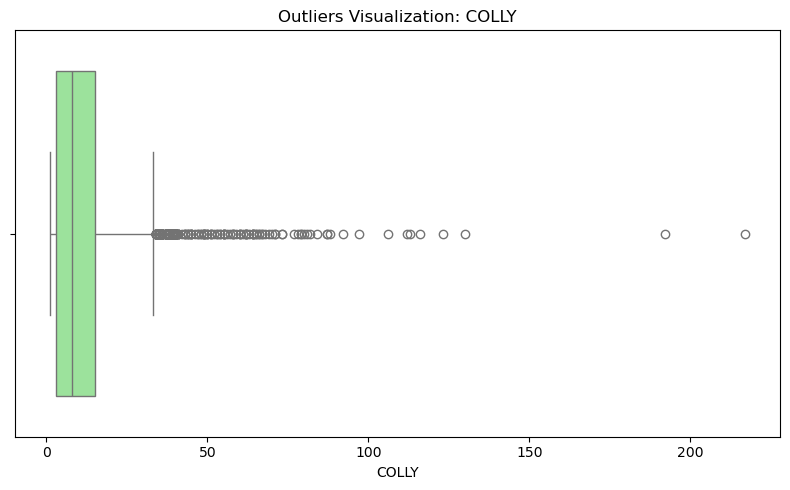

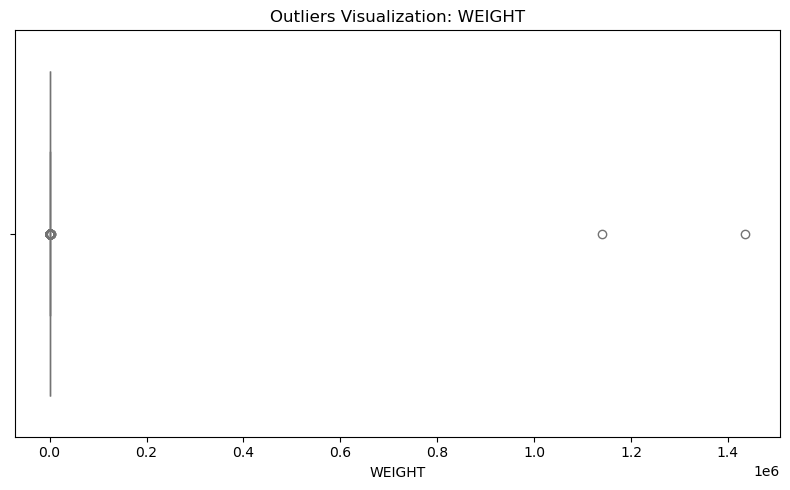

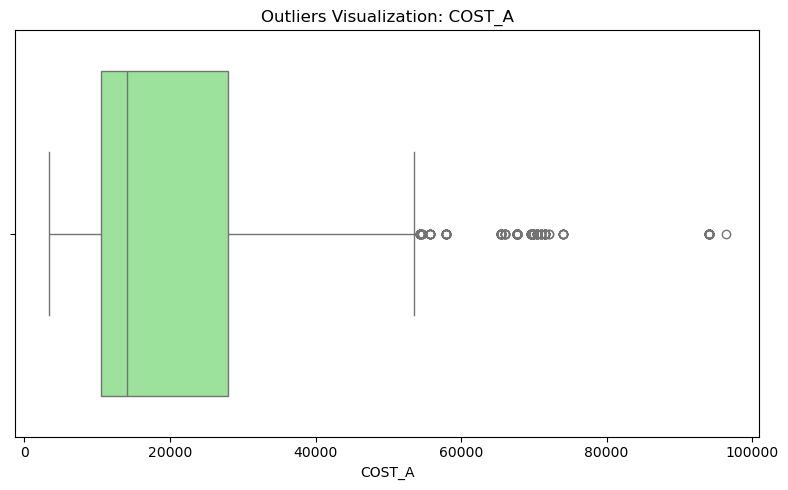

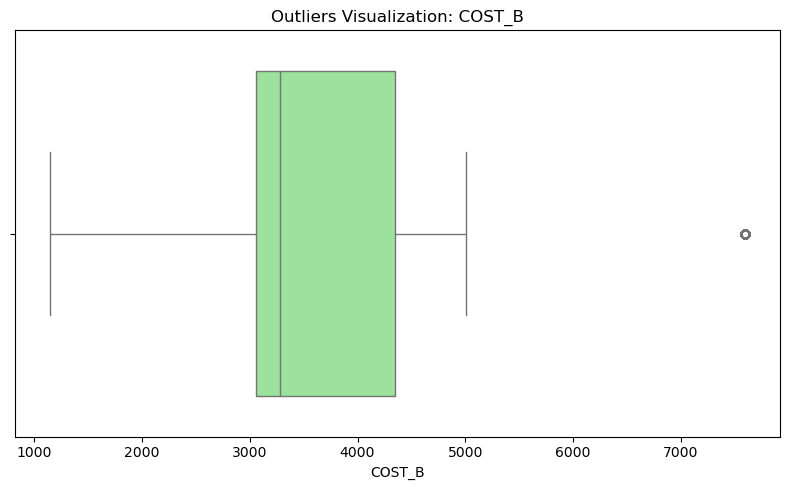

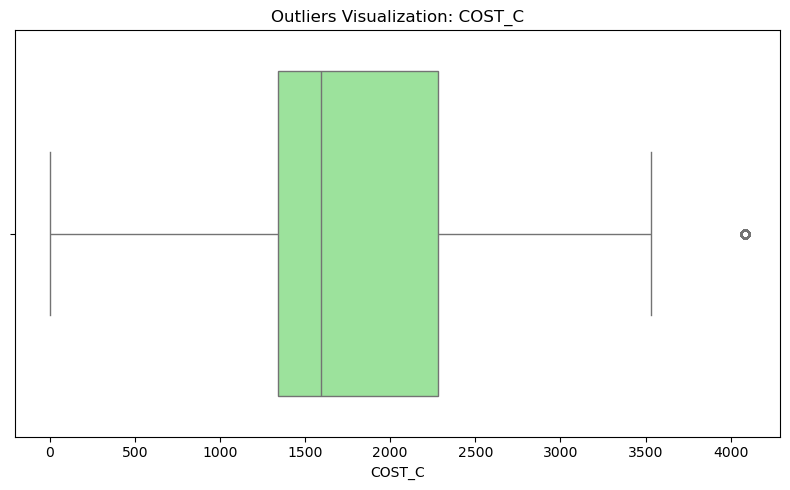

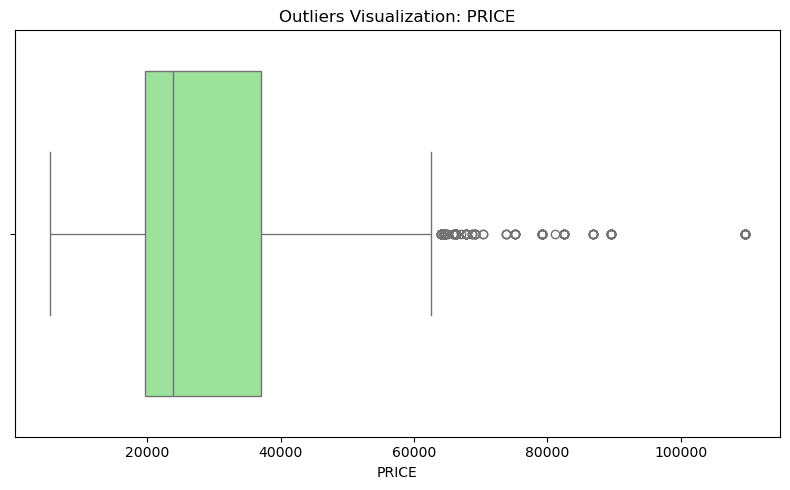

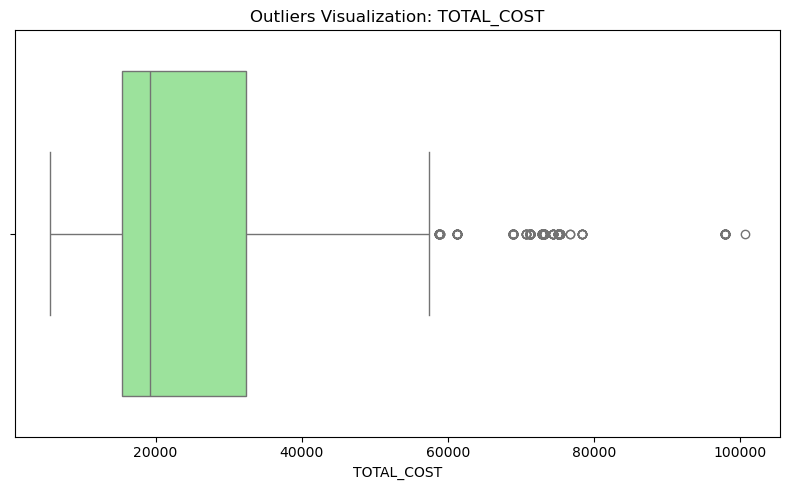

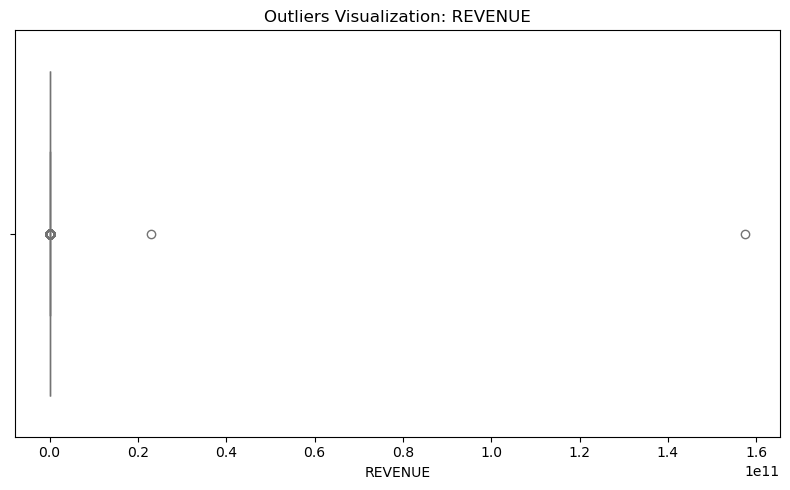

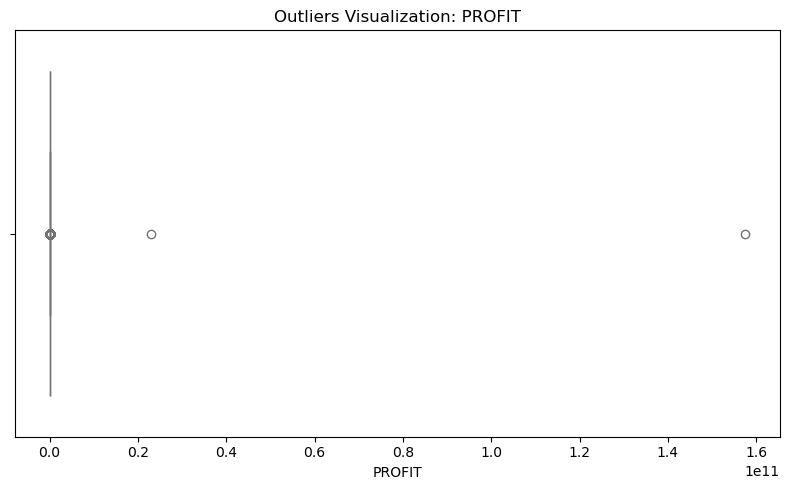

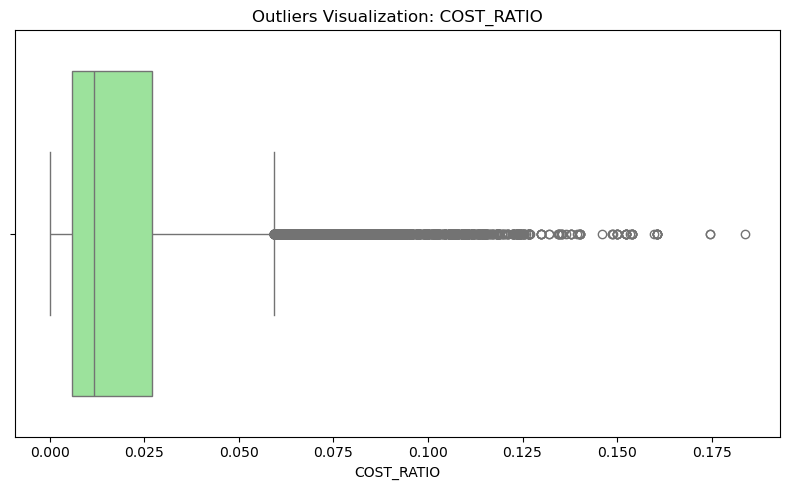

In [26]:
#Plot boxplot untuk setiap kolom numerik
for col in num_cols:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.boxplot(data=df_clean, x=col, ax=ax, color='lightgreen')
    
    ax.set_title(f'Outliers Visualization: {col}')
    plt.tight_layout()
    plt.show()

# 5. Exploratory Data Analysis (EDA)

## Analisa Statistika Deskriptif

In [27]:
df_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,24993,2024-07-03 23:33:40.165646336,2024-07-01 00:00:00,2024-07-02 00:00:00,2024-07-04 00:00:00,2024-07-06 00:00:00,2024-07-07 00:00:00,NaN
COLLY,24993.0,9.234986,1.0,3.0,8.0,15.0,217.0,7.888459
WEIGHT,24993.0,205.175524,10.0,33.0,74.0,145.0,1435628.0,11595.639439
COST_A,24993.0,20362.272756,3330.0,10545.0,14153.0,27972.0,96348.0,13331.912846
COST_B,24993.0,3503.598648,1144.0,3060.0,3282.0,4343.0,7596.0,818.91885
COST_C,24993.0,1688.601768,0.0,1343.0,1594.0,2280.0,4085.0,857.729879
PRICE,24993.0,28307.921818,5320.0,19690.0,23770.0,37000.0,109700.0,12899.200773
TOTAL_COST,24993.0,25036.864202,5496.0,15387.0,19252.0,32315.0,100691.0,13428.442331
REVENUE,24993.0,9827656.291542,53200.0,824500.0,2079930.0,3780000.0,157488391600.0,1006757641.11974
PROFIT,24993.0,9802619.42734,43418.0,798224.0,2049811.0,3757111.0,157488293695.0,1006757188.987016


In [28]:
df_clean.head(10)

,DATE,AIRLINES,ORIGIN,DESTINATION,FLIGHT_NUMB,COLLY,WEIGHT,CUSTOMER,CUST_ID,SERVICE,COST_A,COST_B,COST_C,PRICE,TOTAL_COST,REVENUE,PROFIT,COST_RATIO
0,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0916,5,72.0,PT DINDA SETIA KIRANA,DSK,PTP,9324,4343,2809,11300,13667,813600.0,799933.0,0.016798
1,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0436,1,15.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,15984,4343,1258,31200,20327,468000.0,447673.0,0.043434
2,2024-07-01,CITILINK,JAKARTA,MAKASSAR,QG-0426,6,77.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,13653,4343,1594,34800,17996,2679600.0,2661604.0,0.006716
3,2024-07-01,CITILINK,JAKARTA,BATAM,QG-0968,6,95.0,PT DINDA SETIA KIRANA,DSK,PTP,10545,4343,2280,11050,14888,1049750.0,1034862.0,0.014182
4,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,7,100.0,PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,22100,20327,2210000.0,2189673.0,0.009198
5,2024-07-01,CITILINK,JAKARTA,BANJARMASIN,QG-0482,2,17.0,PT DINDA SETIA KIRANA,DSK,PTP,13542,4343,1367,14200,17885,241400.0,223515.0,0.074089
6,2024-07-01,CITILINK,JAKARTA,BENGKULU,QG-0990,4,40.0,PT DINDA SETIA KIRANA,DSK,PTP,9213,4343,0,9120,13556,364800.0,351244.0,0.037160
7,2024-07-01,CITILINK,JAKARTA,BALIKPAPAN,QG-0424,9,157.0,PT DINDA SETIA KIRANA,DSK,PTP,15984,4343,1258,17200,20327,2700400.0,2680073.0,0.007527
8,2024-07-01,CITILINK,JAKARTA,MEDAN,QG-0910,5,89.0,PT FAJRI ABANGDA PRATAMA,FAP,PTP,9324,4343,2809,25400,13667,2260600.0,2246933.0,0.006046
9,2024-07-01,CITILINK,JAKARTA,PONTIANAK,QG-0414,1,10.0,PT DINDA SETIA KIRANA,DSK,PTP,10878,4343,2450,13585,15221,135850.0,120629.0,0.112043


## A) Faktor Apa Saja yang Memengaruhi Nilai COST_RATIO?

Pengecekan korelasi antara kolom kategorikal dengan kolom COST_RATIO menggunakan metode ANOVA, sedangkan pengecekan korelasi antara kolom numerikal dengan COST_RATIO menggunakan Metode Spearman

In [29]:
results = []

# 🔹 1. Korelasi Numerik (Spearman)
for col in num_cols:
    spearman_corr, p_spearman = stats.spearmanr(df_clean[col], df_clean['COST_RATIO'])
    correlation_status = "Berkorelasi" if p_spearman <= 0.05 else "Tidak Berkorelasi"
    results.append([col, 'Numerical', spearman_corr, p_spearman, correlation_status])

# 🔹 2. Korelasi Kategorikal (ANOVA)
for col in cat_cols:
    groups = [df_clean['COST_RATIO'][df_clean[col] == val] for val in df_clean[col].unique()]
    
    if len(groups) > 1:
        f_stat, p_value_anova = stats.f_oneway(*groups)  # Pake p_value_anova
    else:
        f_stat, p_value_anova = None, None  
    
    correlation_status = "Berkorelasi" if p_value_anova is not None and p_value_anova <= 0.05 else "Tidak Berkorelasi"
    results.append([col, 'Categorical', None, p_value_anova, correlation_status])  # Pake p_value_anova

# 🔹 Buat DataFrame Hasil
df_corr = pd.DataFrame(results, columns=['Column', 'Type', 'Spearman_Corr', 'p_Spearman/ANOVA', 'Korelasi'])
df_corr

,Column,Type,Spearman_Corr,p_Spearman/ANOVA,Korelasi
0,COLLY,Numerical,-0.840547,0.000000e+00,Berkorelasi
1,WEIGHT,Numerical,-0.980295,0.000000e+00,Berkorelasi
2,COST_A,Numerical,0.269678,0.000000e+00,Berkorelasi
3,COST_B,Numerical,0.084550,6.924010e-41,Berkorelasi
4,COST_C,Numerical,-0.096483,9.173903e-53,Berkorelasi
5,PRICE,Numerical,0.168894,2.668713e-159,Berkorelasi
6,TOTAL_COST,Numerical,0.220649,3.200583e-273,Berkorelasi
7,REVENUE,Numerical,-0.880116,0.000000e+00,Berkorelasi
8,PROFIT,Numerical,-0.883570,0.000000e+00,Berkorelasi
9,COST_RATIO,Numerical,1.000000,0.000000e+00,Berkorelasi


Dari hasil analisa di atas, dapat dilihat bahwa semua kolom memiliki pengaruh terhadap COST_RATIO

## B) Jenis Layanan Apa yang Berhasil Menghasilkan Keuntungan Besar? 

In [30]:
sales_ptd = df_clean.loc[df_clean['SERVICE'] == 'PTP', 'PROFIT'].sum()
sales_dtd = df_clean.loc[df_clean['SERVICE'] == 'DTD', 'PROFIT'].sum()

print(f'Penjualan Metode PTD: ', sales_ptd)
print(f'Penjualan Metode DTD: ', sales_dtd)

Penjualan Metode PTD:  167806785914.5
Penjualan Metode DTD:  77190081433.0


Dari hasil perhitungan di atas, dapat dilihat bahwa Metode PTD menghasilkan revenue yang lebih besar daripada DTD. Berikut ini visualisasi hasil penjualan kedua metode tersebut:

<function matplotlib.pyplot.show(close=None, block=None)>

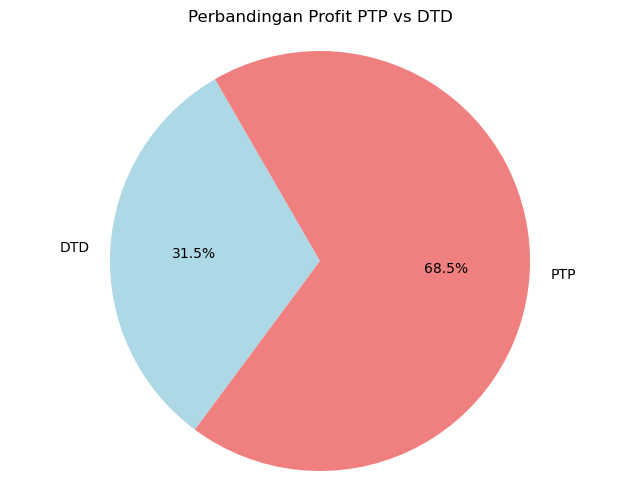

In [31]:
sales_data = df_clean.groupby('SERVICE')['PROFIT'].sum()

plt.figure(figsize=(8,6))
plt.pie(sales_data, labels=sales_data.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=120)
plt.axis('equal')
plt.title('Perbandingan Profit PTP vs DTD')
plt.show

Untuk melakukan analisa lebih jauh mengenai alasan mengapa Metode Pelayanan PTD menghasilkan lebih banyak revenue daripada Metode Pelayanan DTD, akan dilakukan analisa lebih lanajut yang meliputi:

### Analisa Revenue dari Setiap Layanan

In [46]:
df_clean.groupby('SERVICE')['REVENUE'].sum()

SERVICE
DTD    7.764990e+10
PTP    1.679727e+11
Name: REVENUE, dtype: float64

### Analisa Biaya yang Dikeluarkan Perusahaan Berdasarkan Jenis Layanan

In [47]:
df_clean.groupby('SERVICE')['TOTAL_COST'].sum()

SERVICE
DTD    459817301
PTP    165929046
Name: TOTAL_COST, dtype: int64

In [53]:
df_clean.groupby('SERVICE')['WEIGHT'].sum()

SERVICE
DTD    3203299.50
PTP    1924652.36
Name: WEIGHT, dtype: float64

## C) Bagaimana Cost Ratio Masing-Masing Customer?

In [37]:
df_clean['CUSTOMER'].unique()

array(['PT DINDA SETIA KIRANA', 'PT FAJRI ABANGDA PRATAMA',
       'PT ADANI SUBUR MAKMUR', 'PT BAYA SKENA MENYALA',
       'PT HABIB REZA ALKARIM', 'PT PRIMA CAHAYA MEGA'], dtype=object)

In [38]:
customer_sales = df_clean.groupby('CUSTOMER')['COST_RATIO'].median()

for customer, sales in customer_sales.items():
    print(f'Customer {customer} memiliki penjualan sebesar {sales}')

Customer PT ADANI SUBUR MAKMUR memiliki penjualan sebesar 0.007760988299184363
Customer PT BAYA SKENA MENYALA memiliki penjualan sebesar 0.015149483147168333
Customer PT DINDA SETIA KIRANA memiliki penjualan sebesar 0.022242873737825037
Customer PT FAJRI ABANGDA PRATAMA memiliki penjualan sebesar 0.018436064156086056
Customer PT HABIB REZA ALKARIM memiliki penjualan sebesar 0.007943166871738301
Customer PT PRIMA CAHAYA MEGA memiliki penjualan sebesar 0.00821044671312051


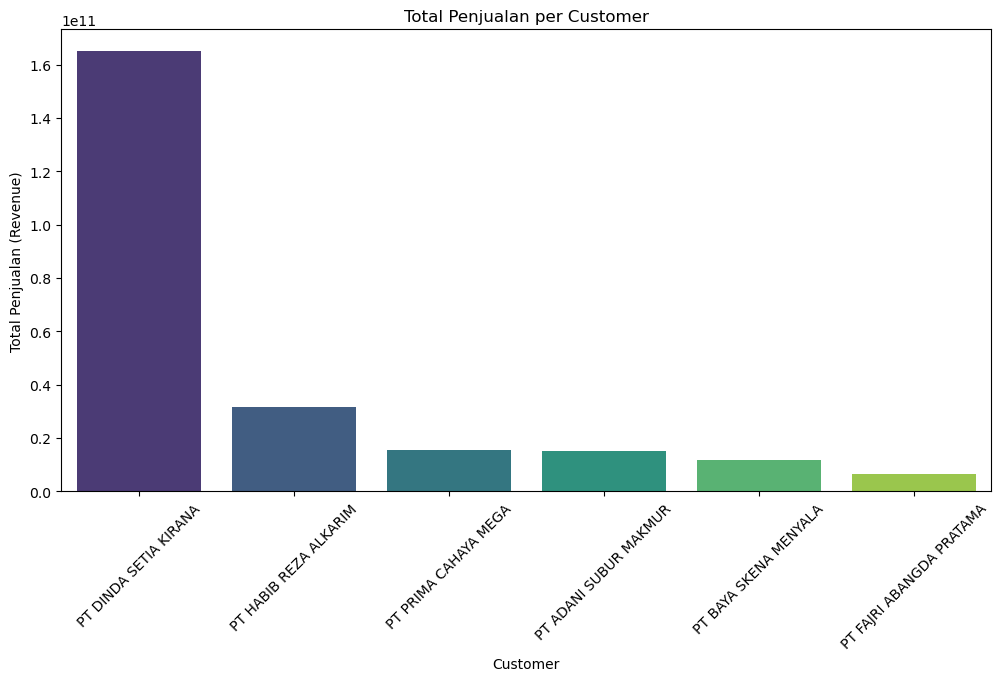

In [39]:
df_sales = df_clean.groupby('CUSTOMER', as_index=False)['REVENUE'].sum().sort_values(by='REVENUE', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=df_sales, x='CUSTOMER', y='REVENUE', palette='viridis', hue='CUSTOMER', legend=False)

plt.xlabel('Customer')
plt.ylabel('Total Penjualan (Revenue)')
plt.title('Total Penjualan per Customer')
plt.xticks(rotation=45)

plt.show()

Dari hasil analisa di atas, dapat dilihat bahwa PT Dinda Setia Kirana memiliki jumlah penjualan terbanyak pada minggu pertama Bulan Juli 2024, sedangkan PT Fajri Abangda Pratama memiliki jumlah penjualan yang paling sedikit

## D) Maskapai Apa yang Memiliki COST_RATIO Terbesar dan Terkecil? 

In [40]:
df_clean['AIRLINES'].unique()

array(['CITILINK', 'GARUDA', 'LION AIR', 'SRIWIJAYA AIR', 'FREIGHTER',
       'PELITA AIR'], dtype=object)

In [41]:
df_clean.columns

Index(['DATE', 'AIRLINES', 'ORIGIN', 'DESTINATION', 'FLIGHT_NUMB', 'COLLY',
       'WEIGHT', 'CUSTOMER', 'CUST_ID', 'SERVICE', 'COST_A', 'COST_B',
       'COST_C', 'PRICE', 'TOTAL_COST', 'REVENUE', 'PROFIT', 'COST_RATIO'],
      dtype='object')

In [42]:
df_clean['CUST_ID'].unique()

array(['DSK', 'FAP', 'ADM', 'BSM', 'BIB', 'MEG'], dtype=object)

In [43]:
airlines_cost_ratio = df_clean.groupby('AIRLINES')['COST_RATIO'].median().reset_index()

print(airlines_cost_ratio.sort_values('COST_RATIO', ascending=True))

        AIRLINES  COST_RATIO
4     PELITA AIR    0.006343
0       CITILINK    0.011495
2         GARUDA    0.012151
3       LION AIR    0.013189
5  SRIWIJAYA AIR    0.014442
1      FREIGHTER    0.015207


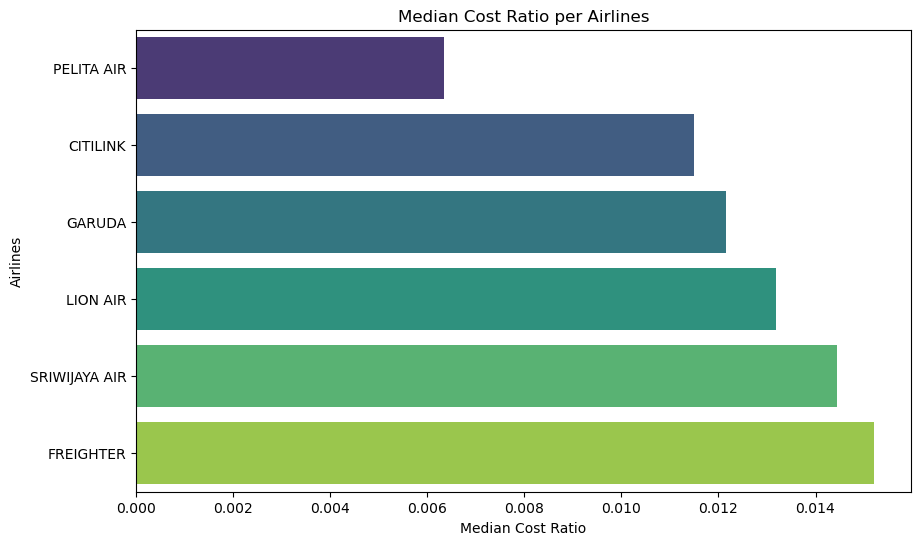

In [44]:
airlines_cost_ratio = airlines_cost_ratio.sort_values('COST_RATIO', ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(data=airlines_cost_ratio, x='COST_RATIO', y='AIRLINES', palette='viridis', legend=False, hue='AIRLINES')
plt.xlabel('Median Cost Ratio')
plt.ylabel('Airlines')
plt.title('Median Cost Ratio per Airlines')
plt.show()


Dari hasil perhitungan di atas, dapat disimpulkan bahwa Pelita Air merupakan Airlines yang paling efektif dengan perbandingan antara Total Cost dan Profit yang paling kecil. Perlu diingat bahwa semakin kecil nilai Cost Ratio nya, semakin besar besar pendapatan yang dihasilkan atau semakin kecil nilai biaya yang pelu dikeluarkan oleh perusahaan. Analisa lebih lanjut akan dilakukan untuk mengetahui alasan fenomena ini dengan perhitungan sebagai berikut:

### Analisa Biaya yang Diperlukan oleh Aiirlines dalam Transportasi Paket

In [51]:
df_clean.groupby('AIRLINES')['WEIGHT'].median().sort_values(ascending=True)

AIRLINES
FREIGHTER         61.0
GARUDA            65.0
SRIWIJAYA AIR     67.0
CITILINK          69.0
LION AIR          73.0
PELITA AIR       117.0
Name: WEIGHT, dtype: float64

### Analisa Biaya yang Perlu Dikeluarkan Perusahaan untuk Masing-Masing Pengoperasian Airlines

In [52]:
df_clean.groupby('AIRLINES')['TOTAL_COST'].median().sort_values(ascending=True)

AIRLINES
CITILINK         16218.0
PELITA AIR       17213.0
SRIWIJAYA AIR    17630.0
GARUDA           21696.0
LION AIR         40653.0
FREIGHTER        41307.0
Name: TOTAL_COST, dtype: float64

# 6. Kesimpulan

Dari hasil analisa di atas, dapat disimpulkan bahwa:
* Cost Ratio dipengaruhi oleh berbagai feature dalam dataset yang mencerminkan efisiensi biaya operasional terhadap pendapatan
* Service PTD lebih menguntungkan daripada DTD karena meskipun revenue nya besar, biaya operasionalnya juga tinggi sehingga menghasilkan profit yang rendah
* Pelanggan dengan Cost Ratio tertinggi adalah PT Dinda Setia Kirana, diikuti oleh PT Habib Reza Alkarim, PT Prima Cahaya Mega, PT Adani Subur Makmur, PT Baya Skena Menyala, dan PT Fajri Abangda Pratama. Pelanggan ini berpotensi diberikan promo untuk meningkatkan loyalitas.
* Maskapai yang paling efisien adalah Pelita Air, diikuti oleh Citilink dan Garuda. Hal ini disebabkan karena biaya operasioanal Pelita Air lebih murah daripada kebanyakan maskapai namun bisa mengangkut barang pengiriman yang lebih berat sehingga menyebabkan Revenue yang besar dan membuat selisih antara Cost Ratio yang kecil

Saran bisnis:
Untuk lebih meningkatkan keuntungan yang diperoleh perusahaan, sebaiknya perlu dikaji ulang layanan (Service) yang disediakan dan maskapai yang digunakan. Saran kepada Divisi Operasional dan Logistik untuk meningkatkan transaksi dengan Jenis Layanan PTD karena dapat menghasilkan keuntungan yang besar serta jumlah biaya yang sedikit. Saran kepada Divisi Customer Relation untuk merancang strategi untuk mempertahankan pelanggan yang memiliki Cost Ratio yang kecil seperti PT Prima Cahaya Mega dan mengembangkan program khusus yang dapat meningkatkan transaksi seperti penawaran harga yang lebih kompetitif kepada customer yang masih memiliki Cost Ratio yang besar seperti Fajri Abangda mengingat biaya operasional yang digunakan untuk mempertahankan customer lama cenderung lebih murah daripada mendapatkan customer baru. Saran untuk Diivisi Supply Chain agar memperkuat kerjasama dengan maskapai yang memiliki cost ratio yang rendah seperti Pelita Air. Evaluasi lebih lanjut juga diperlukan untuk mempertimbangkan efisiensi maskapai dengan cost ratio yang tinggi. 